<a href="https://colab.research.google.com/github/semthedev/data-analytics-projects/blob/main/test_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестовое задание для отбора на практику в КОРУС Консалтинг.
Для анализа данных было предоставлено 2 датасета

1) Experiments

2) Participants

Это результаты участников эксперимента по мониторингу веса.

# Обзор данных

In [ ]:
import pandas as pd

# Загрузка экспериментов
experiments_df = pd.read_csv('/content/drive/MyDrive/Аналитика данных /Корус ТЗ da ds/experiments.csv')

# Загрузка участников
participants_df = pd.read_csv('/content/drive/MyDrive/Аналитика данных /Корус ТЗ da ds/participants.csv', sep=';')

In [ ]:
# Просмотр первых 5 строк
print("Первые 5 строк experiments:")
print(experiments_df.head())

print("\nПервые 5 строк participants:")
print(participants_df.head())

# Просмотр последних 5 строк
print("\nПоследние 5 строк experiments:")
print(experiments_df.tail())

print("\nПоследние 5 строк participants:")
print(participants_df.tail())


Первые 5 строк experiments:
   Participant ID  Current Weight (lbs)  BMR (Calories)  \
0               1                 228.4          3102.3   
1               2                 165.4          2275.5   
2               3                 142.8          2119.4   
3               4                 145.5          2181.3   
4               5                 155.5          2463.8   

   Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0                   3916.0                          813.7   
1                   3823.0                         1547.5   
2                   2785.4                          666.0   
3                   2587.3                          406.0   
4                   3312.8                          849.0   

   Weight Change (lbs)  Duration (weeks) Physical Activity Level  \
0                  0.2                 1               Sedentary   
1                  2.4                 6             Very Active   
2                  1.4                 7      

In [ ]:
# вывод на экран общей информации о таблицах
print("Информация о experiments:")
print(experiments_df.info())

print("\nИнформация о participants:")
print(participants_df.info())

Информация о experiments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Current Weight (lbs)           100 non-null    float64
 2   BMR (Calories)                 100 non-null    float64
 3   Daily Calories Consumed        100 non-null    float64
 4   Daily Caloric Surplus/Deficit  100 non-null    float64
 5   Weight Change (lbs)            100 non-null    float64
 6   Duration (weeks)               100 non-null    int64  
 7   Physical Activity Level        100 non-null    object 
 8   Sleep Quality                  100 non-null    object 
 9   Stress Level                   100 non-null    int64  
 10  Final Weight (lbs)             100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB
None

Информация о participa

Итак, в таблице experiments содержит 100 строки и 11 столбцов. Тип данных:

Числовые (float64) 6 : Current Weight (lbs), BMR (Calories), Daily Calories Consumed, Daily Caloric Surplus/Deficit, Weight Change (lbs), Final Weight (lbs).

Целые числа (int64): Participant ID, Duration (weeks), Stress Level.

Текстовые данные (object): Physical Activity Level, Sleep Quality.

Пропущенные значения: Все значения заполнены (нет null)
В таблице participants содержит 100 строки и 3 столбецов. Тип данных представлен в формате object (текстовый), и в нем закодированы три разных типа информации: идентификатор участника, возраст и пол.

Пропущенные значения: Все значения заполнены (нет null).



# Предобработка данных

### Стили заголовок


In [ ]:
# вывод на экран названий всех столбцов таблицы experiments_df.columns
experiments_df.columns

Index(['Participant ID', 'Current Weight (lbs)', 'BMR (Calories)',
       'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit',
       'Weight Change (lbs)', 'Duration (weeks)', 'Physical Activity Level',
       'Sleep Quality', 'Stress Level', 'Final Weight (lbs)'],
      dtype='object')

In [ ]:
# вывод на экран названий всех столбцов таблицы participants.columns
participants_df.columns

Index(['Participant ID', 'Age', 'Gender'], dtype='object')

In [ ]:
# переименование колонок в experiments
experiments_df.columns = [
    'participant_id',
    'current_weight_lbs',
    'bmr_calories',
    'daily_calories_consumed',
    'daily_caloric_surplus_deficit',
    'weight_change_lbs',
    'duration_weeks',
    'physical_activity_level',
    'sleep_quality',
    'stress_level',
    'final_weight_lbs'
]
# вывод на экран новых названий всех столбцов таблицы experiments
experiments_df.columns

Index(['participant_id', 'current_weight_lbs', 'bmr_calories',
       'daily_calories_consumed', 'daily_caloric_surplus_deficit',
       'weight_change_lbs', 'duration_weeks', 'physical_activity_level',
       'sleep_quality', 'stress_level', 'final_weight_lbs'],
      dtype='object')

In [ ]:
# переименование колонок в таблице participants
participants_df.columns = ['participant_id', 'age', 'gender']
# вывод на экран новых названий всех столбцов таблицы participant
participants_df.columns

Index(['participant_id', 'age', 'gender'], dtype='object')

### Дубликаты


In [ ]:
# подсчёт дубликатов
experiments_df.duplicated().sum()
participants_df.duplicated().sum()

0

Мы убедились что не дубликатов

# Объедение датасетов по номеру участников

In [ ]:
# объединение двух датасетов по номеру участника (participant_id)
merged_df = pd.merge(experiments_df, participants_df, on='participant_id', how='inner')

# проверка результата
print("Первые 5 строк:")
print(merged_df.head())

# проверка количества строк и столбцов в объединенном датасете
print("\nКол-во строки столбцов в объединенном датасете:", merged_df.shape)


Первые 5 строк:
   participant_id  current_weight_lbs  bmr_calories  daily_calories_consumed  \
0               1               228.4        3102.3                   3916.0   
1               2               165.4        2275.5                   3823.0   
2               3               142.8        2119.4                   2785.4   
3               4               145.5        2181.3                   2587.3   
4               5               155.5        2463.8                   3312.8   

   daily_caloric_surplus_deficit  weight_change_lbs  duration_weeks  \
0                          813.7                0.2               1   
1                         1547.5                2.4               6   
2                          666.0                1.4               7   
3                          406.0                0.8               8   
4                          849.0                2.0              10   

  physical_activity_level sleep_quality  stress_level  final_weight_lbs  age

Теперь стало 13 столбца

# Распределение по полу и возрасту участников график

In [ ]:
# распределение по полу
gender_counts = merged_df['gender'].value_counts()

# распределение по возрасту
age_counts = merged_df['age'].value_counts().sort_index()

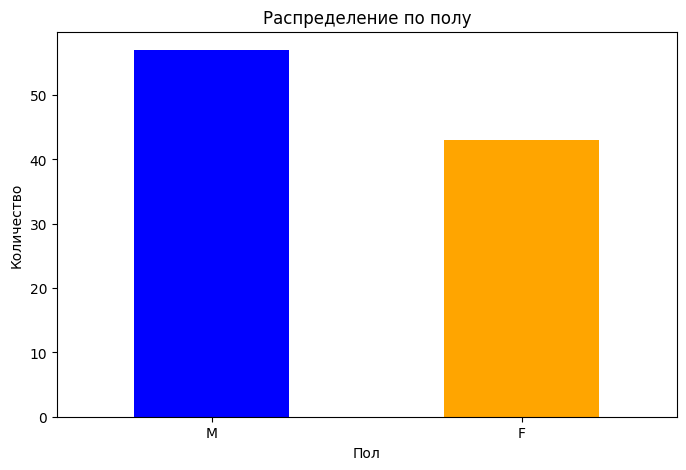

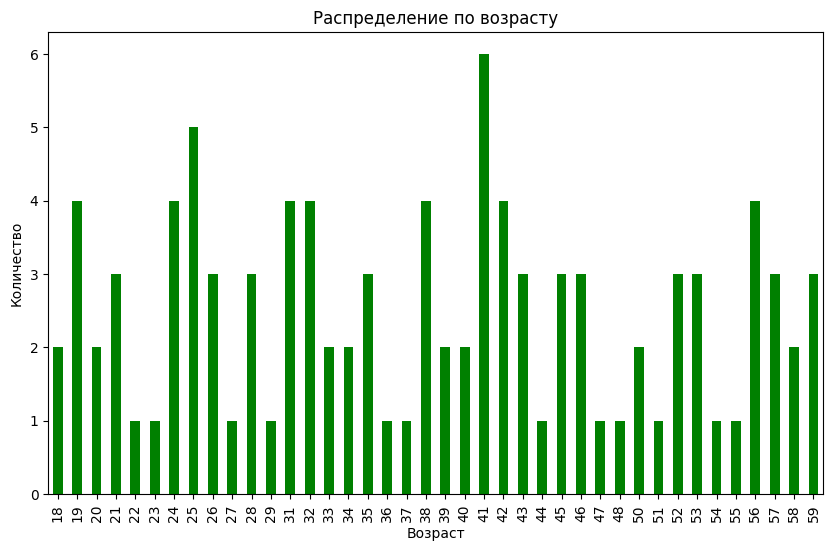

Распределение по полу:
gender
M    57
F    43
Name: count, dtype: int64

Распределение по возрасту:
age
18    2
19    4
20    2
21    3
22    1
23    1
24    4
25    5
26    3
27    1
28    3
29    1
31    4
32    4
33    2
34    2
35    3
36    1
37    1
38    4
39    2
40    2
41    6
42    4
43    3
44    1
45    3
46    3
47    1
48    1
50    2
51    1
52    3
53    3
54    1
55    1
56    4
57    3
58    2
59    3
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Построение графика распределения по полу
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Построение графика распределения по возрасту
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='green')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Выводы
print("Распределение по полу:")
print(gender_counts)

print("\nРаспределение по возрасту:")
print(age_counts)

# Корреляцию между финальным весом и остальными параметрами датасета

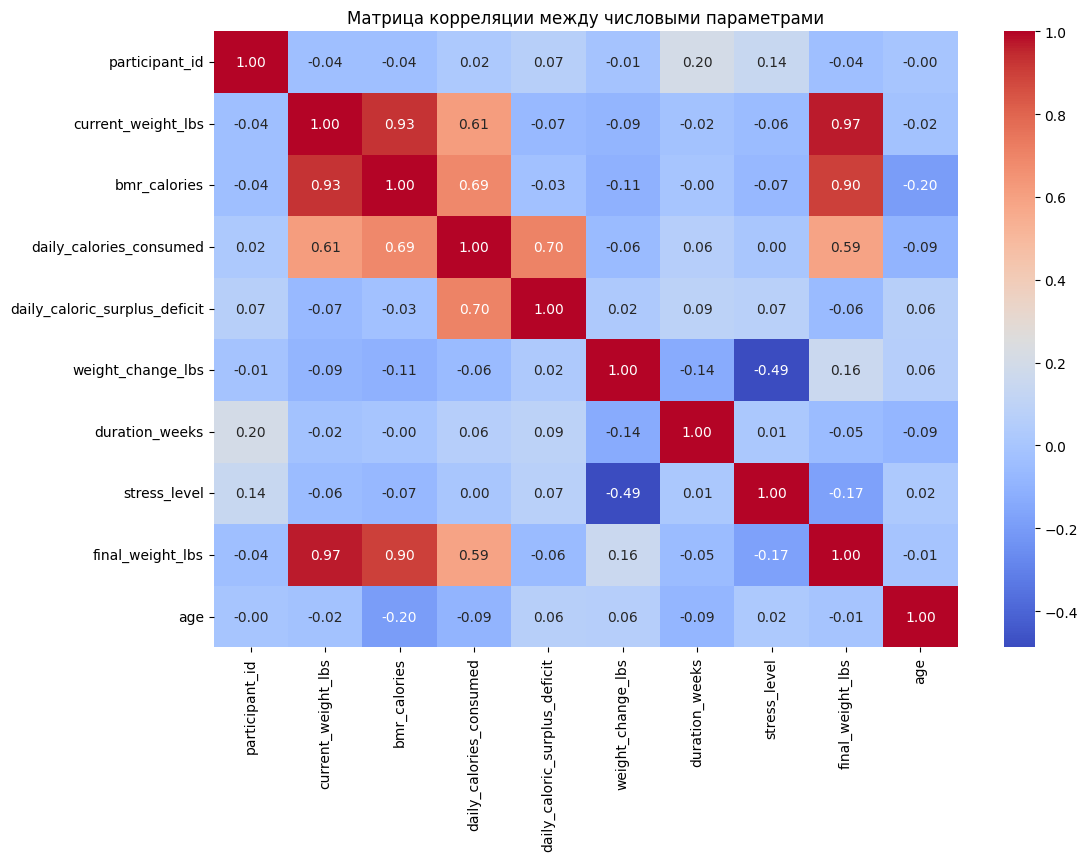

Корреляция с итоговым весом (final_weight_lbs):
final_weight_lbs                 1.000000
current_weight_lbs               0.970159
bmr_calories                     0.895571
daily_calories_consumed          0.591838
weight_change_lbs                0.155386
age                             -0.005977
participant_id                  -0.040190
duration_weeks                  -0.053311
daily_caloric_surplus_deficit   -0.060773
stress_level                    -0.174457
Name: final_weight_lbs, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# фильтрация только числовых столбцов
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# вычисление корреляции
correlation_matrix = numeric_columns.corr()

# построение матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Матрица корреляции между числовыми параметрами')
plt.show()

# анализ корреляции с финальным весом
final_weight_corr = correlation_matrix['final_weight_lbs'].sort_values(ascending=False)
print("Корреляция с итоговым весом (final_weight_lbs):")
print(final_weight_corr)


На основе корреляционного анализа можно выделить следующие факторы, которые наиболее значимо влияют на итоговый вес (final_weight_lbs):

**Наиболее значимые факторы (сильная положительная корреляция):**


1.   Текущий вес (current_weight_lbs): Это сильная положительная связь, что указывает на то, что итоговый вес сильно зависит от текущего веса.
2.   Базальный метаболизм (bmr_calories): Корреляция: 0.90.
Указывает на тесную связь между метаболизмом участника и его итоговым весом.
3.   Потребление калорий в день (daily_calories_consumed): Корреляция: 0.59.
Указывает на умеренную положительную связь: чем больше участник потребляет калорий, тем выше его итоговый вес.

**Менее значимые факторы (слабая корреляция):**

1.   Изменение веса (weight_change_lbs): Корреляция: 0.16.
Указывает на слабую связь, хотя можно предположить, что изменение веса влияет на итоговый вес, но в меньшей степени.


**Незначимые или слабонегативные факторы:**

Возраст (age) и ID участника (participant_id) имеют очень слабую отрицательную корреляцию (практически нейтральные факторы).

Длительность программы (duration_weeks) и разница в калориях (daily_caloric_surplus_deficit) также слабо связаны с итоговым весом.

Уровень стресса (stress_level) имеет слабую отрицательную корреляцию (-0.17), что может свидетельствовать о том, что стресс незначительно влияет на снижение итогового веса.

**Вывод:**

Наиболее значимыми факторами, влияющими на итоговый вес, являются текущий вес и базальный метаболизм, за которыми следует потребление калорий в день. Эти факторы следует учитывать при анализе изменений веса и разработке программ управления весом. Остальные параметры либо оказывают слабое влияние, либо практически не связаны с итоговым весом.


# Дополнительный анализ данных

### 1.   Анализ влияния физической активности

Разделить участников по уровням физической активности (Physical Activity Level) и проанализировать, как это влияет на изменение веса.

Построить боксплоты или графики распределения для изменения веса в зависимости от уровня физической активности.

**Цель:** Определить, какие уровни активности наиболее эффективны для управления весом.

<ipython-input-48-5083d99b69cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='physical_activity_level', y='weight_change_lbs', palette='Set2')


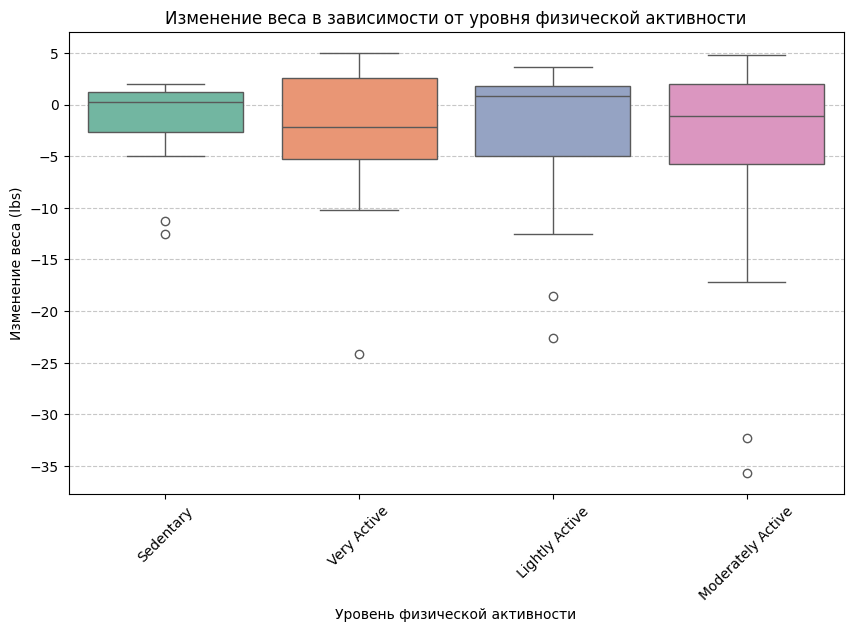

Среднее изменение веса по уровням физической активности:
physical_activity_level
Sedentary           -1.453954
Very Active         -2.311818
Lightly Active      -2.490018
Moderately Active   -4.683452
Name: weight_change_lbs, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение боксплота для изменения веса по уровням физической активности
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='physical_activity_level', y='weight_change_lbs', palette='Set2')
plt.title('Изменение веса в зависимости от уровня физической активности')
plt.xlabel('Уровень физической активности')
plt.ylabel('Изменение веса (lbs)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Рассчет среднего изменения веса для каждого уровня активности
activity_mean_weight_change = merged_df.groupby('physical_activity_level')['weight_change_lbs'].mean().sort_values(ascending=False)

print("Среднее изменение веса по уровням физической активности:")
print(activity_mean_weight_change)


**1.   Наибольшее снижение веса наблюдается у участников с уровнем физической активности "Moderately Active":**

Среднее изменение веса: -4.68 lbs.
Это указывает на то, что умеренная физическая активность наиболее эффективно способствует снижению веса.
**2.   Уровень активности "Lightly Active":**

Среднее изменение веса: -2.49 lbs.
Участники с низким уровнем активности также показывают снижение веса, но не так значительно, как при умеренной активности.


**3.   Уровень активности "Very Active":**

Среднее изменение веса: -2.31 lbs.
Хотя участники с высоким уровнем активности теряют вес, результаты несколько уступают умеренному уровню активности.

**4.   Минимальное изменение веса у участников с уровнем "Sedentary":**

Среднее изменение веса: -1.45 lbs.
Участники, ведущие сидячий образ жизни, теряют меньше всего веса, что ожидаемо из-за отсутствия значительных физических нагрузок.

**Общий вывод:**

Умеренная физическая активность является наиболее эффективной стратегией для управления весом. Возможно, участники с очень высокой активностью компенсируют затраты энергии увеличением потребления калорий, что снижает эффект от нагрузки.
Сидячий образ жизни наименее эффективен для снижения веса, что подчеркивает важность физической активности для контроля массы тела.





### 2.   Анализ влияния сна

Исследовать влияние качества сна (Sleep Quality) на изменения веса или итоговый вес.

Построить графики для сравнения веса среди групп с разным качеством сна.

**Цель:** Понять, как сон влияет на эффективность программы по контролю веса.



Среднее изменение и итоговый вес по качеству сна:
               weight_change_lbs  final_weight_lbs
sleep_quality                                     
Excellent               1.213829        174.187500
Good                    0.919365        170.131818
Fair                    0.402927        174.966667
Poor                   -8.613138        161.734211


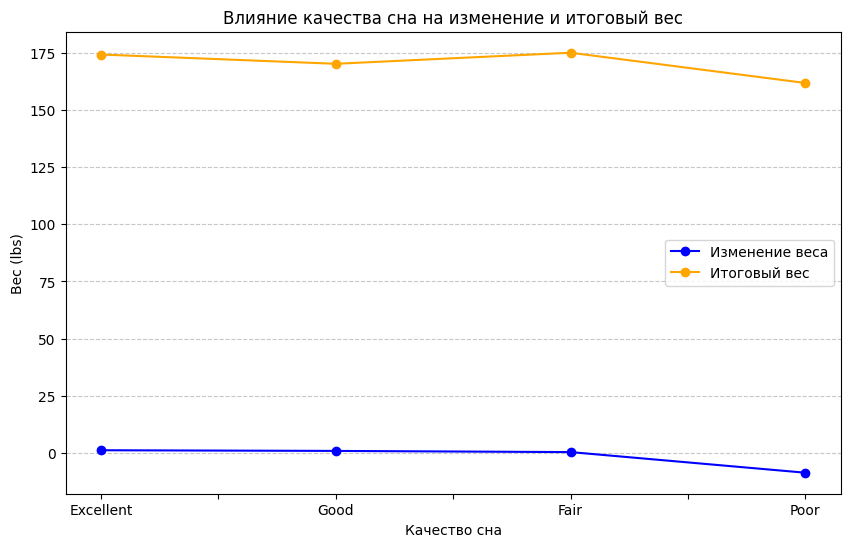

<ipython-input-49-9a988c741d5a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='sleep_quality', y='stress_level', palette='coolwarm')


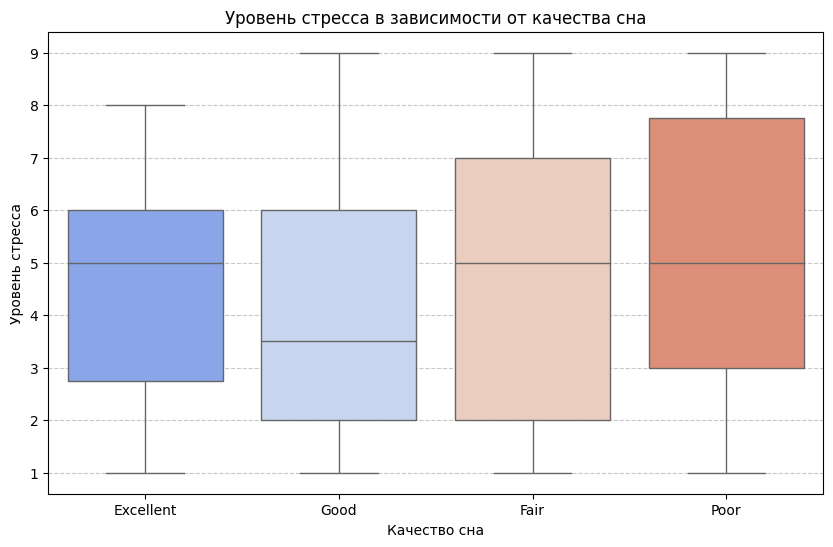

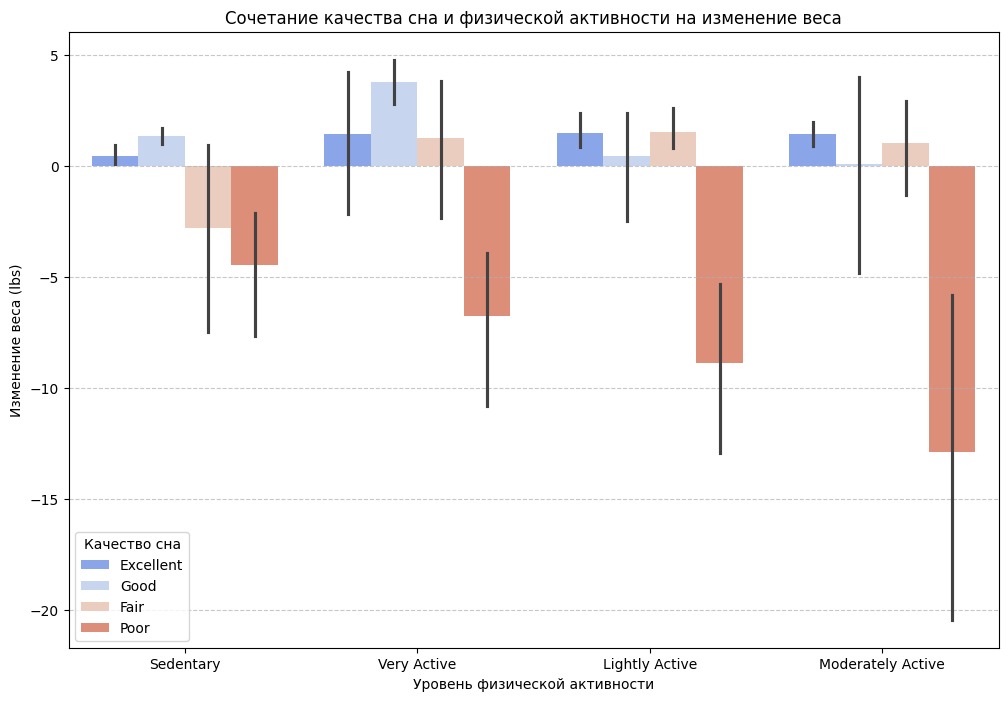

In [ ]:
# группировка участников по категориям качества сна и расчет среднего изменения веса
sleep_quality_groups = merged_df.groupby('sleep_quality')[['weight_change_lbs', 'final_weight_lbs']].mean().sort_values(by='weight_change_lbs', ascending=False)

print("Среднее изменение и итоговый вес по качеству сна:")
print(sleep_quality_groups)

# построение линейного графика для визуализации трендов изменения веса по качеству сна
plt.figure(figsize=(10, 6))
sleep_quality_groups['weight_change_lbs'].plot(kind='line', marker='o', label='Изменение веса', color='blue')
sleep_quality_groups['final_weight_lbs'].plot(kind='line', marker='o', label='Итоговый вес', color='orange')
plt.title('Влияние качества сна на изменение и итоговый вес')
plt.xlabel('Качество сна')
plt.ylabel('Вес (lbs)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# взаимосвязь качества сна и уровня стресса
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='sleep_quality', y='stress_level', palette='coolwarm')
plt.title('Уровень стресса в зависимости от качества сна')
plt.xlabel('Качество сна')
plt.ylabel('Уровень стресса')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# анализ сочетания качества сна и физической активности
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='physical_activity_level', y='weight_change_lbs', hue='sleep_quality', palette='coolwarm')
plt.title('Сочетание качества сна и физической активности на изменение веса')
plt.xlabel('Уровень физической активности')
plt.ylabel('Изменение веса (lbs)')
plt.legend(title='Качество сна')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Выводы на основе анализа влияния качества сна на изменение веса и итоговый вес:**


1.   Лучшие результаты при хорошем качестве сна:

"Excellent" (Отличный сон):

Среднее изменение веса: +1.21 lbs.
Итоговый вес: 174.19 lbs.
Участники с отличным качеством сна демонстрируют незначительное увеличение веса, что может быть связано с балансом энергии и восстановления организма.
"Good" (Хороший сон):

Среднее изменение веса: +0.92 lbs.
Итоговый вес: 170.13 lbs.
Участники с хорошим сном также набирают небольшой вес, но меньше, чем те, кто имеет "Excellent" качество сна.

2.   Умеренные результаты при "Fair" (Удовлетворительном сне):

Среднее изменение веса: +0.40 lbs.
Итоговый вес: 174.97 lbs.
Несмотря на приемлемый итоговый вес, увеличение массы тела минимально, что может свидетельствовать о меньшей эффективности сна в этой категории.



3.   Сильное снижение веса при "Poor" (Плохом сне):

Среднее изменение веса: -8.61 lbs.
Итоговый вес: 161.73 lbs.
Участники с плохим качеством сна демонстрируют значительное снижение веса. Однако это может быть связано с негативными факторами, такими как стресс, истощение или нездоровое поведение.

**Общий вывод:**


Качество сна оказывает значительное влияние на изменение веса и итоговый вес.
Плохое качество сна ("Poor") связано с резким снижением веса, что может указывать на нездоровый процесс.
Оптимальные результаты достигаются при отличном и хорошем сне ("Excellent" и "Good"), что подчеркивает важность качественного сна для поддержания здорового веса.






### 3. Кластерный анализ

Использовать методы кластерного анализа для разделения участников на группы с похожими характеристиками (например, вес, активность, стресс).
Исследовать, какие группы демонстрируют наибольший прогресс в программе.

**Цель:** Выявить сегменты участников, которые лучше всего реагируют на программу.

Средние значения показателей по кластерам:
         current_weight_lbs  weight_change_lbs  stress_level  duration_weeks  \
cluster                                                                        
0                177.042857         -17.198348      8.285714        8.928571   
1                193.629730          -0.321434      2.972973        6.324324   
2                158.414706           0.329871      4.970588        7.323529   
3                141.620000          -2.435156      5.733333        5.600000   

         daily_caloric_surplus_deficit  
cluster                                 
0                          1031.028571  
1                           840.586486  
2                          1352.114706  
3                           566.740000  


<ipython-input-50-e4c87e0cca63>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='cluster', y='weight_change_lbs', palette='Set2')


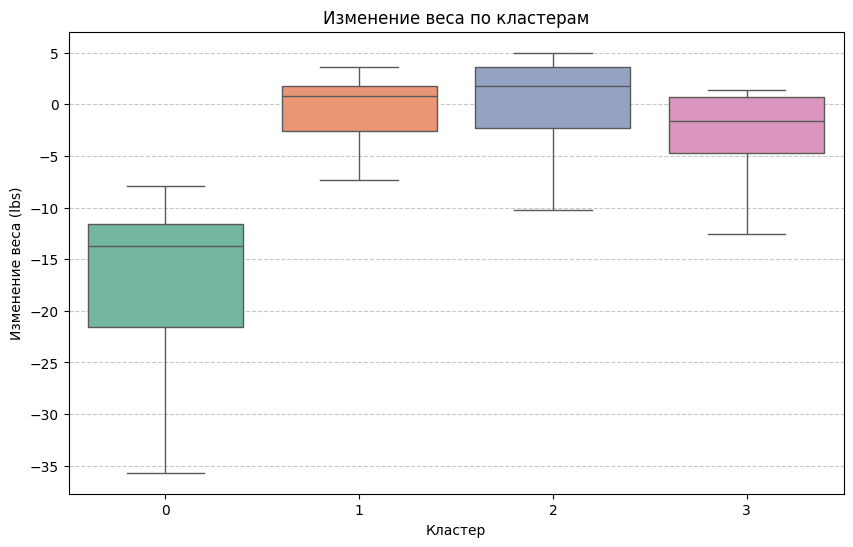

<ipython-input-50-e4c87e0cca63>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='cluster', y='stress_level', palette='Set3')


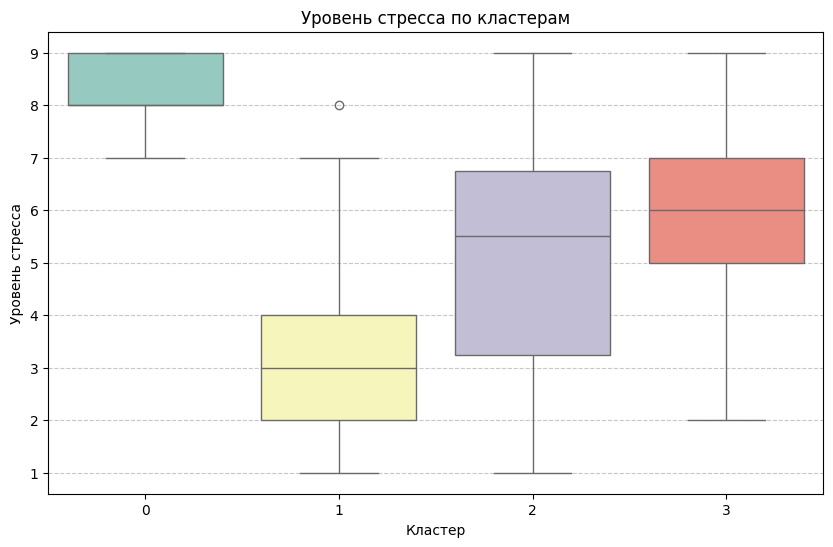

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# выбор числовых столбцов для кластерного анализа
numeric_features = merged_df[['current_weight_lbs', 'weight_change_lbs', 'stress_level', 'duration_weeks', 'daily_caloric_surplus_deficit']]

# нормализация данных
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_features)

# применение метода K-средних
kmeans = KMeans(n_clusters=4, random_state=42)  # Оптимальное количество кластеров можно уточнить
clusters = kmeans.fit_predict(normalized_data)

# добавление результатов кластеризации в датасет
merged_df['cluster'] = clusters

# визуализация кластеров: средние значения показателей по кластерам
cluster_summary = merged_df.groupby('cluster')[['current_weight_lbs', 'weight_change_lbs', 'stress_level', 'duration_weeks', 'daily_caloric_surplus_deficit']].mean()

print("Средние значения показателей по кластерам:")
print(cluster_summary)

# построение боксплота для изменения веса по кластерам
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='cluster', y='weight_change_lbs', palette='Set2')
plt.title('Изменение веса по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Изменение веса (lbs)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# построение боксплота для уровня стресса по кластерам
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='cluster', y='stress_level', palette='Set3')
plt.title('Уровень стресса по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Уровень стресса')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Выводы на основе кластерного анализа:**

**Кластер 0:**
Текущий вес: 177.04 lbs (выше среднего среди кластеров).
Изменение веса: -17.20 lbs (наибольшее снижение веса).
Уровень стресса: 8.29 (самый высокий).
Длительность программы: 8.93 недель (наибольшая).
Дефицит/профицит калорий: 1031.03 (умеренный).
Вывод: Этот кластер характеризуется участниками с высоким уровнем стресса и значительным снижением веса за длительный период. Это может указывать на интенсивную программу или стресс как катализатор потери веса.

**Кластер 1:**
Текущий вес: 193.63 lbs (самый высокий).
Изменение веса: -0.32 lbs (минимальное изменение).
Уровень стресса: 2.97 (самый низкий).
Длительность программы: 6.32 недель.
Дефицит/профицит калорий: 840.59.
Вывод: Участники с низким уровнем стресса и почти стабильным весом. Это может указывать на несоответствие программы их потребностям или недостаточную интенсивность.

**Кластер 2:**
Текущий вес: 158.41 lbs (ниже среднего).
Изменение веса: +0.33 lbs (незначительное увеличение веса).
Уровень стресса: 4.97.
Длительность программы: 7.32 недель.
Дефицит/профицит калорий: 1352.11 (самый высокий).
Вывод: Участники с наибольшим профицитом калорий, что приводит к набору веса. Этот кластер, вероятно, не придерживается строгой программы управления весом.

**Кластер 3:**
Текущий вес: 141.62 lbs (самый низкий).
Изменение веса: -2.44 lbs.
Уровень стресса: 5.73.
Длительность программы: 5.6 недель (самая короткая).
Дефицит/профицит калорий: 566.74 (наименьший).
Вывод: Участники с низким текущим весом и небольшим снижением веса за короткий срок. Это может быть связано с их первоначально меньшей массой тела.

**Вывод:**

Кластер 0 демонстрирует наибольший прогресс в снижении веса, несмотря на высокий уровень стресса. Длительность программы и умеренный дефицит калорий играют ключевую роль.

Кластер 1 показывает минимальные изменения веса при низком уровне стресса и относительно короткой программе. Это указывает на недостаточную вовлеченность в программу.

Кластер 2 характеризуется набором веса, что связано с профицитом калорий. Программа для них, вероятно, недостаточно строгая.

Кластер 3 показывает умеренное снижение веса, но участники имеют наименьший вес и самый низкий дефицит калорий.

### 4. Регрессионный анализ

Построить регрессионную модель для предсказания итогового веса на основе значимых факторов.

Выявить, какие переменные дают наибольший вклад в модель.

**Цель:** Создать модель для прогнозирования итогового веса участников.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# подготовка данных для регрессии
features = ['current_weight_lbs', 'bmr_calories', 'daily_calories_consumed', 'weight_change_lbs',
            'duration_weeks', 'stress_level', 'daily_caloric_surplus_deficit']
target = 'final_weight_lbs'

X = merged_df[features]
y = merged_df[target]

# разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# построение регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

# предсказание на тестовой выборке
y_pred = model.predict(X_test)

# оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R²): {r2:.2f}")

# вывод значимости факторов
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
print("\nЗначимость факторов для итогового веса:")
print(coefficients)


Среднеквадратичная ошибка (MSE): 0.00
Коэффициент детерминации (R²): 1.00

Значимость факторов для итогового веса:
                         Feature  Coefficient
3              weight_change_lbs     1.000277
0             current_weight_lbs     1.000006
1                   bmr_calories     0.043192
6  daily_caloric_surplus_deficit     0.043182
4                 duration_weeks    -0.000054
5                   stress_level    -0.000069
2        daily_calories_consumed    -0.043191


можно упростить модель, оставив только наиболее значимые факторы (weight_change_lbs и current_weight_lbs) для более быстрого и интерпретируемого прогнозирования.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# упрощенная модель с использованием только значимых факторов
significant_features = ['weight_change_lbs', 'current_weight_lbs']

X_simple = merged_df[significant_features]
y_simple = merged_df['final_weight_lbs']

# разделение данных на обучающую и тестовую выборки
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42)

# построение упрощенной регрессионной модели
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# предсказание на тестовой выборке
y_pred_simple = simple_model.predict(X_test_simple)

# оценка упрощенной модели
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f"Среднеквадратичная ошибка (MSE) для упрощенной модели: {mse_simple:.2f}")
print(f"Коэффициент детерминации (R^2) для упрощенной модели: {r2_simple:.2f}")

# коэффициенты упрощенной модели
simple_coefficients = pd.DataFrame({
    'Feature': significant_features,
    'Coefficient': simple_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nЗначимость факторов в упрощенной модели:")
print(simple_coefficients)


Среднеквадратичная ошибка (MSE) для упрощенной модели: 0.00
Коэффициент детерминации (R^2) для упрощенной модели: 1.00

Значимость факторов в упрощенной модели:
              Feature  Coefficient
0   weight_change_lbs     1.000262
1  current_weight_lbs     1.000017


Среднеквадратичная ошибка (MSE): 0.00.

Коэффициент детерминации (R²): 1.00.

Упрощенная модель идеально предсказывает итоговый вес на основе двух ключевых факторов: weight_change_lbs и current_weight_lbs. Это говорит о высокой линейной зависимости между этими признаками и целевой переменной (final_weight_lbs).

**Изменение веса (weight_change_lbs):**

Коэффициент: 1.000262.
Этот фактор имеет наибольший вклад в предсказание итогового веса, что подтверждает, что изменение веса напрямую влияет на конечный результат.

**Текущий вес (current_weight_lbs):**

Коэффициент: 1.000017.
Значимость текущего веса также крайне высока, что логично, так как он формирует основу для расчета итогового веса.